<a href="https://colab.research.google.com/github/SharatKhote/Exploratory-Data-Analysis/blob/main/Project_(Hotel_Bookins).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
hotel_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv')

In [17]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [18]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [21]:
hotel_data.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

In [24]:
hotel_data[['agent','company']] = hotel_data[['agent','company']].fillna(0.0)

In [27]:
hotel_data['country'].fillna(hotel_data.country.mode().to_string(), inplace=True)

In [28]:
## for missing children value, replace it with rounded mean value

hotel_data['children'].fillna(round(hotel_data.children.mean()), inplace=True)

In [30]:
## convert datatype of these columns from float to integer
hotel_data[['children', 'company', 'agent']] = hotel_data[['children', 'company', 'agent']].astype('int64')

In [33]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


**1.Which type of hotel does a customer book in general?**

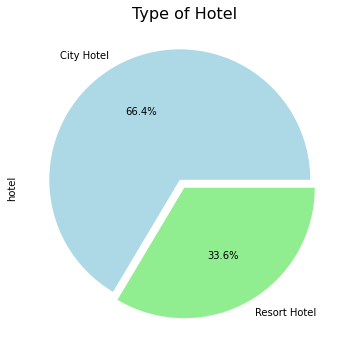

In [42]:
plt.figure(figsize = (6,6))
explode =[0.07,0]
colors = ['lightblue','lightgreen']
gen = hotel_data['hotel'].value_counts().plot(kind = 'pie',autopct = '%.1f%%', explode = explode , colors = colors)
plt.title('Type of Hotel', fontsize = 16)
plt.show()

**2.Which year most of customer arrive?**

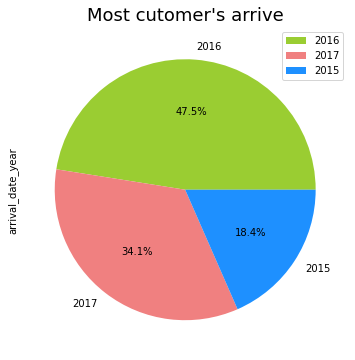

In [47]:
plt.figure(figsize = (6,6))
plt.title('''Most cutomer's arrive''', fontsize = 18)
colors = ['yellowgreen','lightcoral','dodgerblue']
hotel_data['arrival_date_year'].value_counts().plot(kind = 'pie', autopct = '%.1f%%',colors = colors)
plt.legend()


**4.How many bookings were cancelled?**

In [57]:
hotel_data['is_canceled'].value_counts(normalize = True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

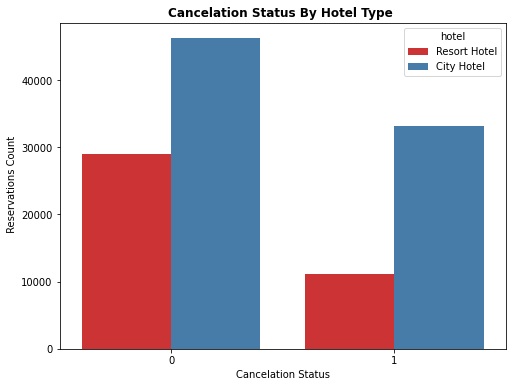

In [58]:
plt.figure(figsize = (8,6))
sns.countplot(x='is_canceled', data = hotel_data, hue = 'hotel', palette= 'Set1')

plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()

**5.From which country most guest arrive?**

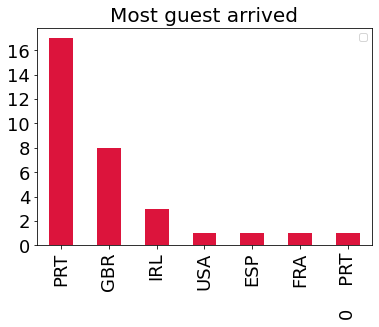

In [53]:
pts = hotel_data['country'].head(32)
plt.title('Most guest arrived', fontsize = 20)
plt.legend()
gen = pts.value_counts().plot(kind = 'bar', color = 'crimson', fontsize = 18)

**6.How customer booked their hotel from market segment?**

Text(0, 0.5, 'Booking Count')

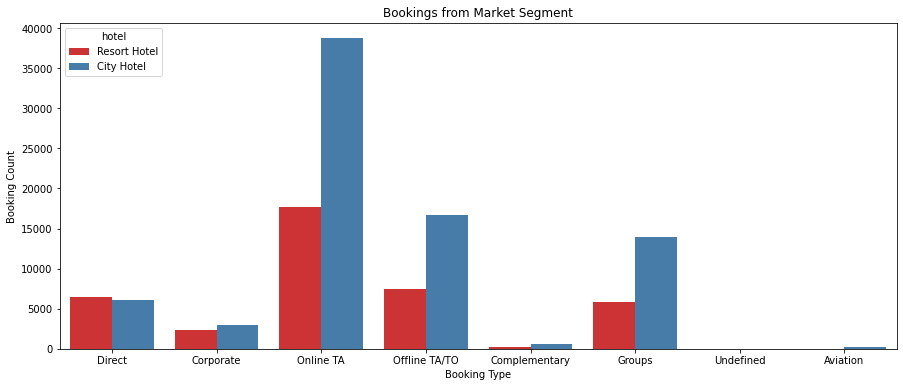

In [73]:
plt.figure(figsize=(15,6))
sns.countplot(data = hotel_data, x= 'market_segment', hue = 'hotel', palette= 'Set1')

plt.title ('Bookings from Market Segment')
plt.xlabel("Booking Type")
plt.ylabel('Booking Count')

**7. How many customers were stays in week nights and booking changes?**

Text(0, 0.5, 'Booking Count')

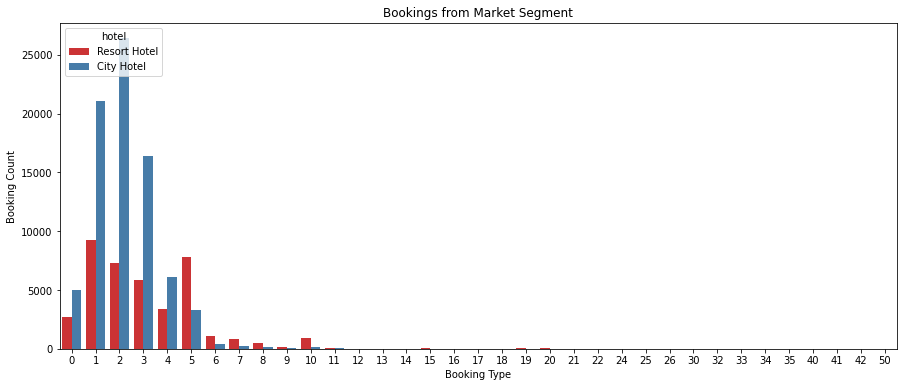

In [75]:
plt.figure(figsize=(15,6))
sns.countplot(data = hotel_data, x= 'stays_in_week_nights', hue = 'hotel', palette= 'Set1')

plt.title ('Bookings from Market Segment')
plt.xlabel("Booking Type")
plt.ylabel('Booking Count')

In [62]:
hotel_data.sort_values(by= ['stays_in_week_nights','booking_changes'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
131,Resort Hotel,0,9,2015,July,28,5,1,0,2,...,No Deposit,0,0,0,Transient,88.20,0,1,Check-Out,2015-07-06
132,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,0,0,0,Transient,97.00,0,0,Canceled,2015-07-01
134,Resort Hotel,0,9,2015,July,28,5,1,0,1,...,No Deposit,0,0,0,Transient,89.00,0,0,Check-Out,2015-07-06
135,Resort Hotel,0,2,2015,July,28,5,1,0,1,...,No Deposit,0,0,0,Transient,80.10,0,0,Check-Out,2015-07-06
136,Resort Hotel,0,2,2015,July,28,5,1,0,2,...,No Deposit,0,0,0,Transient,98.00,0,0,Check-Out,2015-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,Resort Hotel,1,322,2017,January,2,10,16,40,2,...,No Deposit,0,0,0,Transient,25.50,0,0,Canceled,2016-10-31
33924,Resort Hotel,0,71,2017,January,2,10,16,40,2,...,No Deposit,0,0,0,Transient,28.79,0,0,Check-Out,2017-03-07
101794,City Hotel,0,140,2016,September,39,22,16,41,0,...,No Deposit,0,0,0,Transient,8.34,0,2,Check-Out,2016-11-18
14037,Resort Hotel,0,113,2015,August,31,1,18,42,1,...,No Deposit,0,0,0,Transient,110.50,0,3,Check-Out,2015-09-30


In [64]:
hotel_data['market_segment']

0                Direct
1                Direct
2                Direct
3             Corporate
4             Online TA
              ...      
119385    Offline TA/TO
119386        Online TA
119387        Online TA
119388        Online TA
119389        Online TA
Name: market_segment, Length: 119390, dtype: object

In [74]:
hotel_data['booking_changes']

0         3
1         4
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: booking_changes, Length: 119390, dtype: int64

In [15]:
hotel_data['hotel'].count_values()

AttributeError: ignored